# 2차원 데이터의 정리

## <span style = "color:green">두 데이터 사이의 관계를 나타내는 지표

영어 점수가 높은 학생일수록 수학점수도 높은 경향이 있다면, 영어 점수와 수학 점수는 양의 상관관계 (= 쉽게 말해 **비례관계**)<br/>
영어 점수가 높은 학생일수록 수학 점수가 낮은 경향이 있다면 영어 점수와 수학 점수는 음의 상관관계 (= 쉽게 말해 **반비례 관계**)

영어 점수가 수학 점수에 직접적으로 영향을 미치지 않으면 영어점수와 수학 점수는 **무상관**

-------
### <span style="color:magenta">산점도
1. 두 측정형 변수의 함수관계를 표현한 2차원 그래프
2. 인과관계가 있다면 종속변수에 해당되는 변수 y-축, 설명변수에 해당되는 변수 x-축 
3. 함수형태 (특히 직선, 직선관계가 해석과 활용이 용이함) 
----------
71p에서 [그림 3-1]점수의 산점도 를 보면 각 학생들의 영어와 수학 점수를 찍은 산점도가 있습니다. 예를 들어 학생 B는 영어 약 69점, 수학 약 80점을 가지고 있습니다. <br/>
두가지 과목에 대한 각 학생들의 점수를 점으로 표시해둔 것이 산점도 입니다.
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
pd.set_option('precision', 3)  #precision은 소수점은 과학적 표기법으로 변환할 자릿수를 정합니다. 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시합니다.자릿수가 아주 작거나 큰 수를 표기할 때 유용합니다.

In [2]:
df = pd.read_csv('../data/ch2_scores_em.csv',  #파일을 읽는다
                 index_col='student number')

In [3]:
en_scores = np.array(df['english'])[:10]    #english 컬럼의 10행까지 읽고, 배열을 만든다.
ma_scores = np.array(df['mathematics'])[:10] #math 컬럼의 10행까지 읽고 배열을 만든다.

scores_df = pd.DataFrame({'english':en_scores,   #위에서 만든 en_scores와 ma_scores를 가지고 데이터 프레임을 만든다.
                                  'mathematics':ma_scores}, #인덱스명은 A~J까지 준다.
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

english  mathematics
student                      
A             42           65
B             69           80
C             56           63
D             41           63
E             57           76
F             48           60
G             65           81
H             49           66
I             65           78
J             58           82

In [4]:
# 설명을 위해 summary_df2 를 생성했습니다. 

summary_df2 = scores_df.copy()

summary_df2['english_mean']= summary_df2['english'].mean()
summary_df2['english_deviation'] =\
    summary_df2['english'] - summary_df2['english'].mean()


In [5]:
summary_df2['math_mean']= summary_df2['mathematics'].mean()
summary_df2['mathematics_deviation'] =\
    summary_df2['mathematics'] - summary_df2['mathematics'].mean()


In [6]:
summary_df2['english'].mean()

55.0

In [7]:
summary_df2['mathematics'].mean()

71.4

In [8]:
summary_df2['product of deviations'] =\
    summary_df2['english_deviation'] * summary_df2['mathematics_deviation']

summary_df2=summary_df2[['english','english_mean','english_deviation','mathematics','math_mean','mathematics_deviation','product of deviations']]
summary_df2   #product of deviations는 영어의 편차와 수학의 편차를 곱해 면적을 만든 값. 

english  english_mean  english_deviation  mathematics  math_mean  \
student                                                                     
A             42          55.0              -13.0           65       71.4   
B             69          55.0               14.0           80       71.4   
C             56          55.0                1.0           63       71.4   
D             41          55.0              -14.0           63       71.4   
E             57          55.0                2.0           76       71.4   
F             48          55.0               -7.0           60       71.4   
G             65          55.0               10.0           81       71.4   
H             49          55.0               -6.0           66       71.4   
I             65          55.0               10.0           78       71.4   
J             58          55.0                3.0           82       71.4   

         mathematics_deviation  product of deviations  
student                                                
A                         -6.4                   83.2  
B                          8.6                  120.4  
C                         -8.4                   -8.4  
D                         -8.4                  117.6  
E                          4.6                    9.2  
F                        -11.4                   79.8  
G                          9.6                   96.0  
H                         -5.4                   32.4  
I                          6.6                   66.0  
J                         10.6                   31.8

In [9]:
summary_df2['product of deviations'].mean(0)  #면적값의 평균을 낸것이고, 이것을 공분산이라고 한다. 
                                            #62.8이 양의 값이므로 영어와 수학점수는 양의 상관관계를 가진다는 의미이고, 영어의 점수가 높으면 수학의 점수도 높다.

62.8

----
1.공분산에서는 가로와 세로의 데이터가 다르므로 한쪽은 편차가 양의 값이고, 다른 한쪽은 음의 값인 경우에 면적이 음의 값이 되어버린다.<br/>
그래서 73에서 c 학생의 'product of deviations'(=편차곱)을 보면 -8.4 라는 음의 값이 나오는데, <br/>
영어 점수 편차는 양수고, 수학 점수 편차는 음의 값이라서 면적이 음이 되어버린다.
#### **2.면적의 평균은 상관의 지표가 되고 이것을 '공분산'(=편차곱의 평균)이라고 합니다.**
공분삭이 양의 값이면 면적이 양의 값이 되는 데이터가 많다는 뜻이므로 양의 상관관계에 있고<br/>
공분산이 음의 값이면 면적이 음의 값이 되는 데이터가 많다는 뜻으로 음의 상관관계에 있다. <br/>
공분산이 0에 가까우면 무상관을 나타낸다. 

In [10]:
# 여기서부터 73p 내용
summary_df = scores_df.copy()


summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()


summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()

In [11]:
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

english  mathematics  english_deviation  mathematics_deviation  \
student                                                                   
A             42           65              -13.0                   -6.4   
B             69           80               14.0                    8.6   
C             56           63                1.0                   -8.4   
D             41           63              -14.0                   -8.4   
E             57           76                2.0                    4.6   
F             48           60               -7.0                  -11.4   
G             65           81               10.0                    9.6   
H             49           66               -6.0                   -5.4   
I             65           78               10.0                    6.6   
J             58           82                3.0                   10.6   

         product of deviations  
student                         
A                         83.2  
B                        120.4  
C                         -8.4  
D                        117.6  
E                          9.2  
F                         79.8  
G                         96.0  
H                         32.4  
I                         66.0  
J                         31.8

In [12]:
summary_df['product of deviations'].mean()

62.8

-----------------
## <span style="color:magenta">Numpy의 경우 공분산은 cov함수로 구할 수 있다.
그러나 반환값은 공분산 값이 아닌 공분산 행렬(covariance matrix) 또는 분산공분산 행렬(variance-covariance matrix)라고 부르는 행렬이 나온다.

-----------
### [numpy.cov()의 입력변수](https://kongdols-room.tistory.com/70)

<center>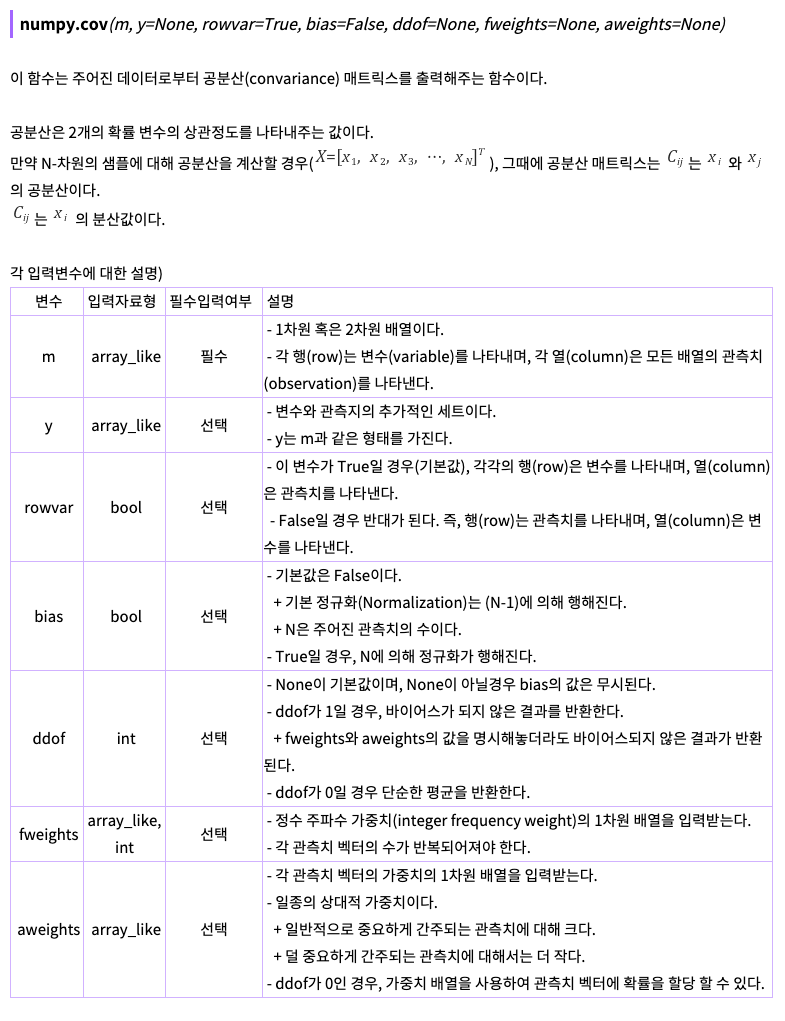</center> 


In [13]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)  #ddof=0을 넣으면 단순한 평균을 반환한다. 
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

>([영어와 영어의 공분산, **영어와 수학의 공분산**],<br/>
         [**영어와 수학의 공분산**, 수학과 수학의의 공분산])    
         
동일한 변수들의 공분산은 해당 변수의 분산과 같다. 결국 [0,0] 성분은 영어의 분산, [1,1]성분은 수학의 분산이 된다. 

In [14]:
cov_mat[0, 1], cov_mat[1, 0]  # 튜플형태 cov_mat의 (0행의 1열 , 1행의 0열)

(62.800000000000004, 62.800000000000004)

In [15]:
cov_mat[0, 0], cov_mat[1, 1].round(4)

(86.0, 68.44)

In [16]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0).round(4) #numpy의 분산을 구하는 메서드는 np.var(array_like, ddof=0)

(86.0, 68.44)

---
## <span style = "color:magenta">자유도란?
자유도는 degrees of freedom이다. 통계학에서 의마하는 자유도는 모집단에 대한 정보를 제공하는 독립된 표본의 수를 의미한다.
x+y+z=10 과 같은 방정식에서 별다른 조건이 없다면 이 방정식의 해는 무수히 많다고 결론을 내릴 수 있고 자유변수는 3개다 라고 추측할 수 있다
하지만, 실제로 이 방정식에서 자유변수는 2개이다. 왜냐면 x와 y값이 정해졌을 경우, z값은 x와 y에 의해 자동으로 결정되기 때문이다. 이런의미에서 우리는 방정식의 자유도가 2이다 라고 표현한다.

ddof = 0 (표본분산)
ddof = 1 (불편분산)

### [ddof, 표본분산, 불편분산](https://m.blog.naver.com/ao9364/222023124818)

----
## <span style = "color:magenta">상관계수

>공분산의 크기는 단위에 따라 달라지므로 절대적 크기로 판단이 어렵다.<br/>
그래서 공분산을 -1 ~ 1 범위로 표준화 시킨 것이 <span style="color:red">**상관계수**

In [17]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /(np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [18]:
np.corrcoef(en_scores, ma_scores) # numpy array에서 상관계수 구하는 법

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [19]:
scores_df.corr()  #데이터프레임에서 상관계수 구하는 법 

english  mathematics
english        1.000        0.819
mathematics    0.819        1.000

------
## <span style="color:magenta">상관계수 구하는 법!!
1. `np.corrcoef(en_socores, ma_scores)` <br/>
2. `scores_df.corr()` 
위의 2가지가 훨씬 직관적입니다. <br/>
<span style="color:red" >두가지 코드는 외워둡시다!!

> Numpy의 경우 상관계수는 corrcoef 함수로 구할 수 있는데, 반환값은 공분산의 경우와 마찬가지로 상관행렬 (correlation matrix)라고 부르는 행렬이다.
(= 함수를 쓰면 딱 상관계수값인 0.819만 나오는 것이 아니라 array 형태로 나온다.)
    

<center>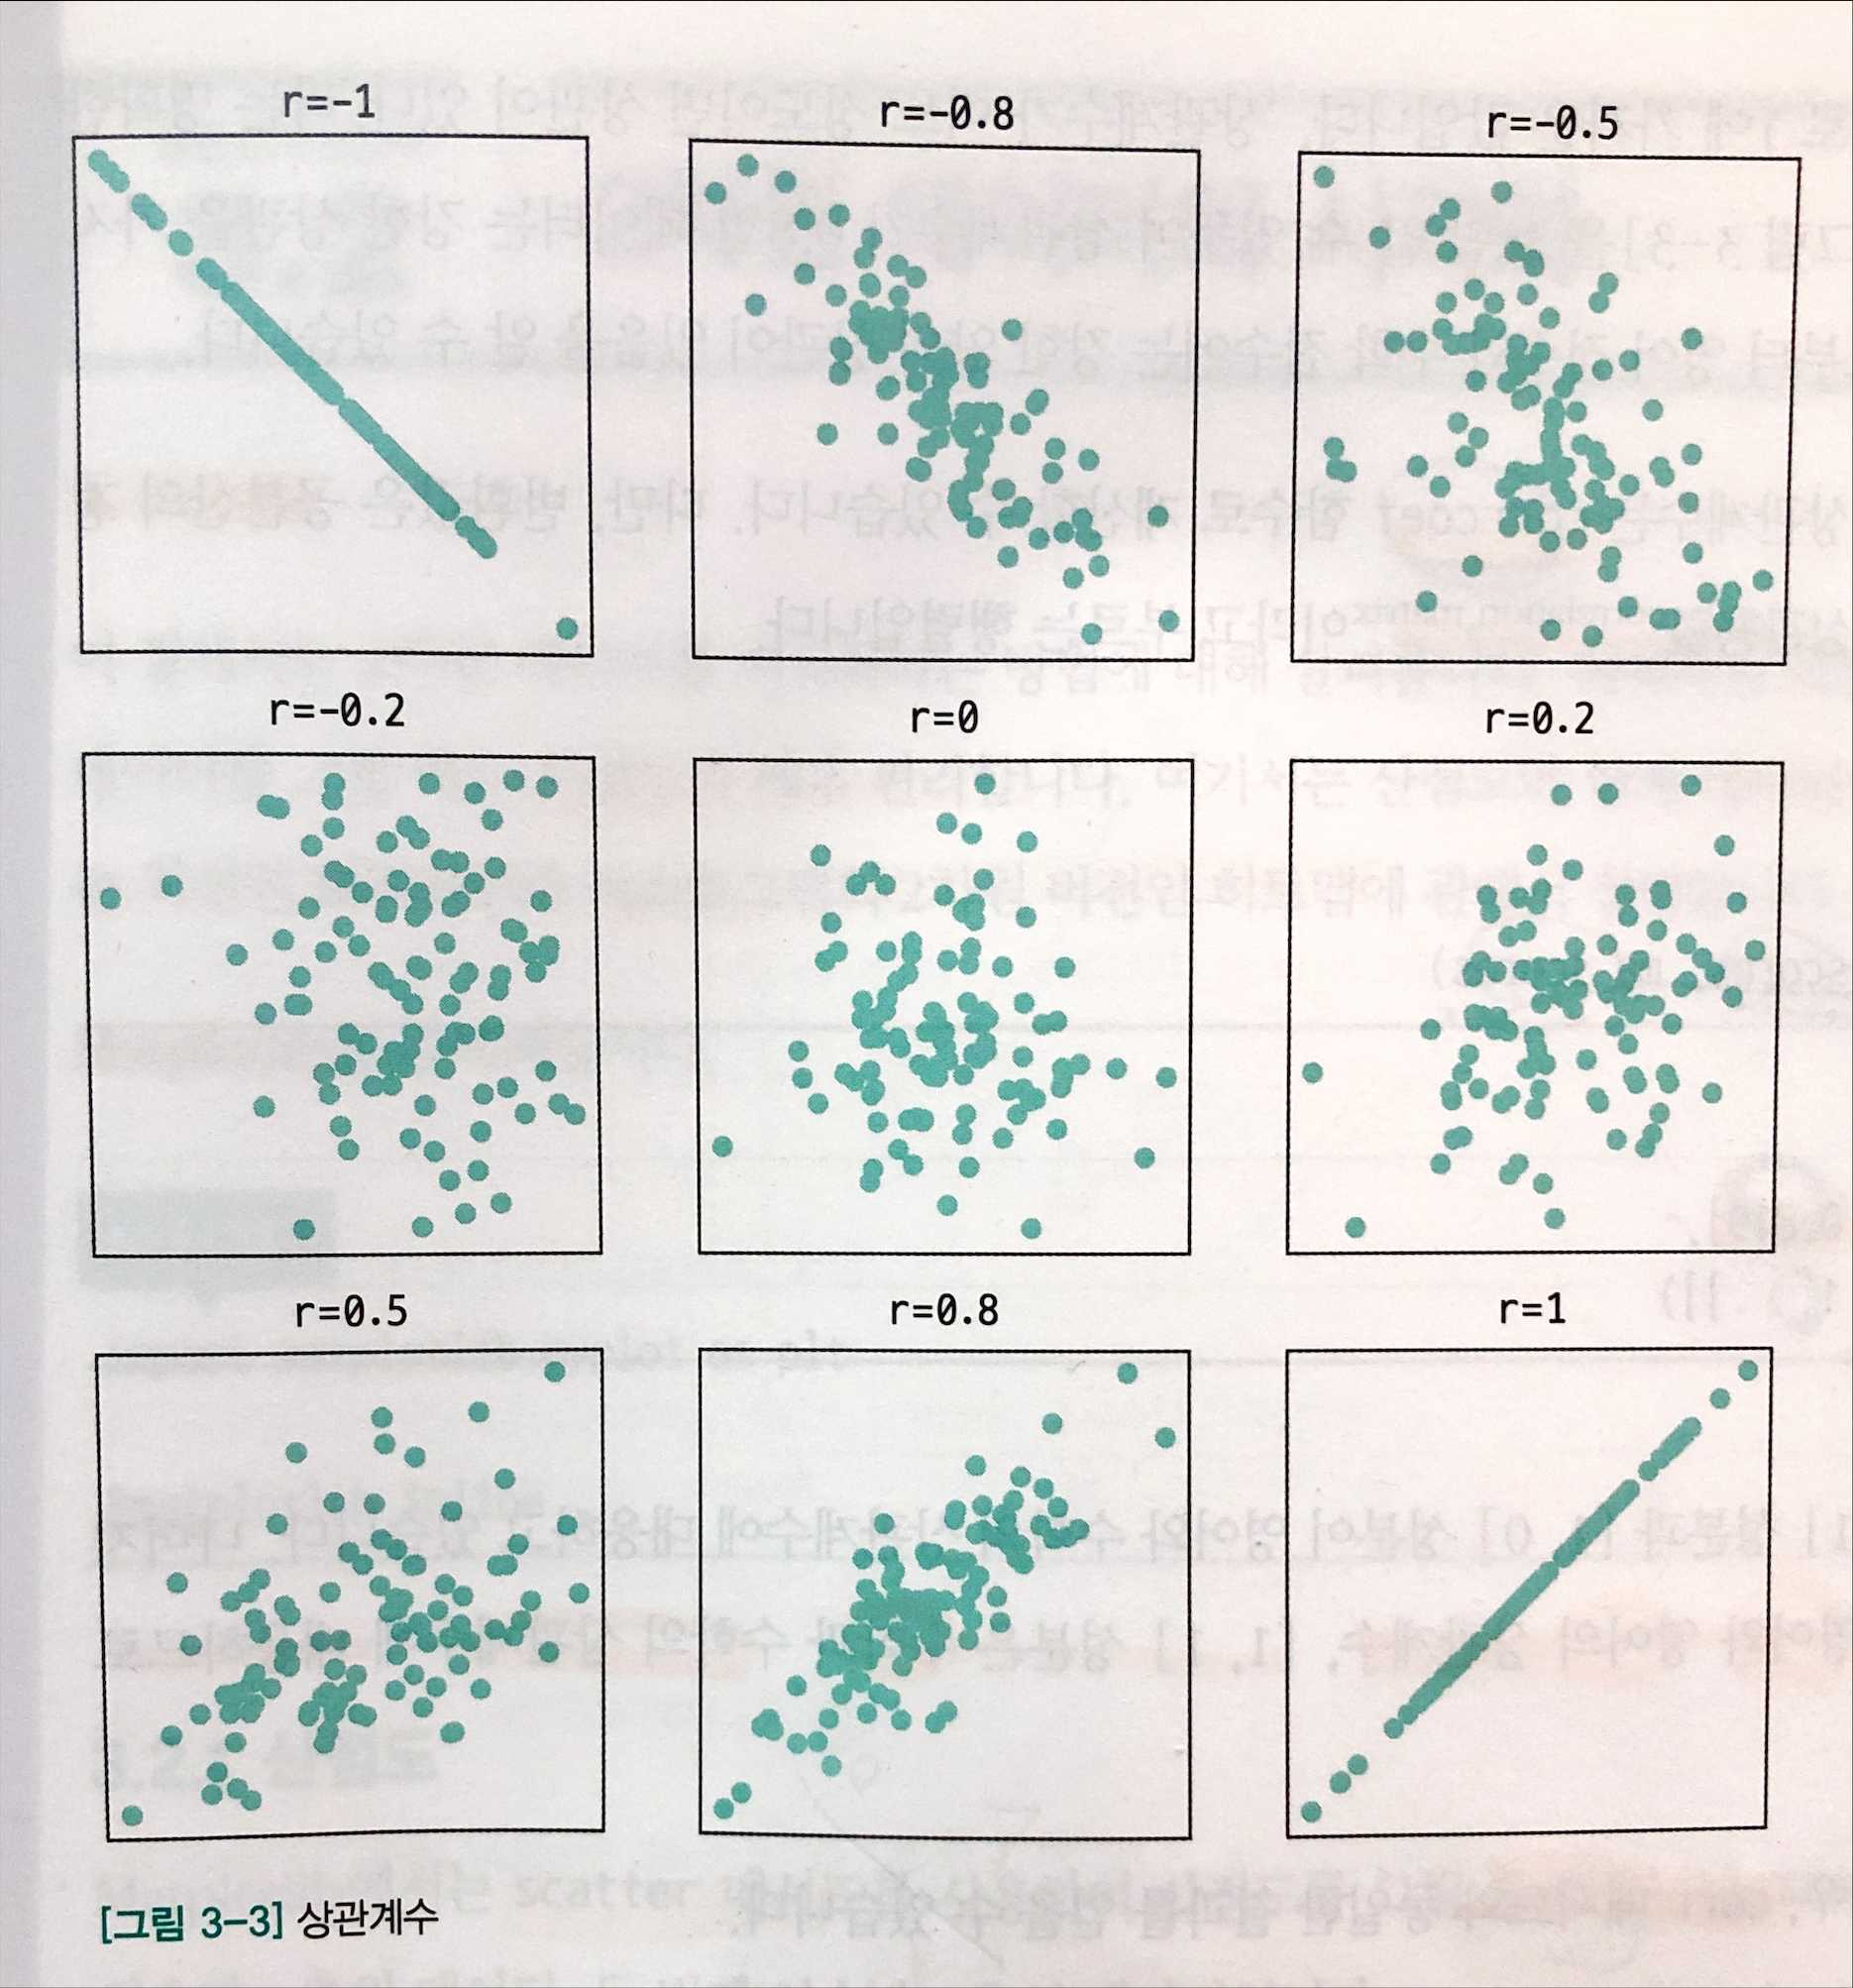</center>


## <span style = "color:red"><center><상관계수 -1 ~ 1 일때></center>  

------
## <span style = "color:green">2차원 데이터의 시각화

## <span style = "color:magenta">산점도
2차원 데이터를 시각화하여 데이터를 그릴때는 산점도가 매우 편리하다.


<center>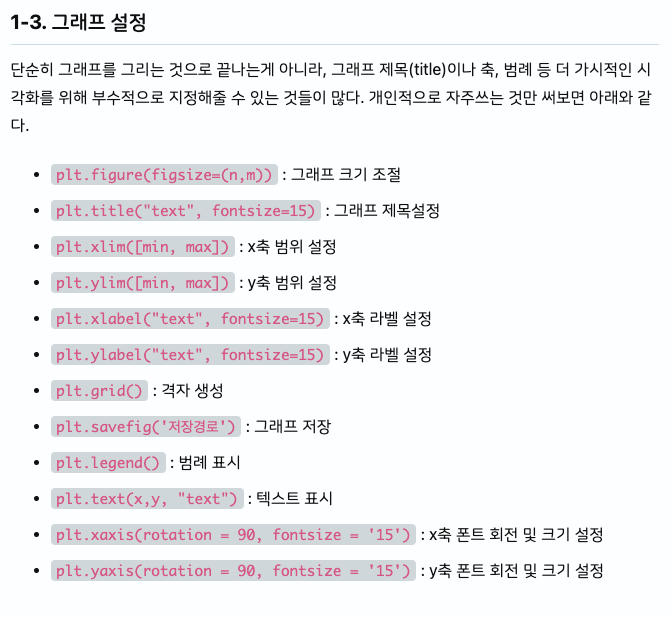</center>


In [20]:
import matplotlib.pyplot as plt  # matplotlib에서는 scatter 메서드를 사용해서 산점도를 그릴 수 있다.
                                # scatter의(x축의 데이터, y축의 데이터)

%matplotlib inline

------------
## matplotlib에서는 <span style="color:red">scatter 메서드를 사용해서 산점도를 그릴 수 있다.
**scatter의(x축의 데이터, y축의 데이터)**

-------------

In [21]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

In [22]:
english_scores  #matplotlib의 scatter메서드를 쓰기 전에 넣을 인수들은 np.array 메소드를 이용해 array로 만들어 놨습니다. 

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66])

In [23]:
math_scores    #matplotlib의 scatter메서드를 쓰기 전에 넣을 인수들은 np.array 메소드를 이용해 array로 만들어 놨습니다. 

array([65, 80, 63, 63, 76, 60, 81, 66, 78, 82, 94, 75, 70, 77, 84, 84, 82,
       85, 90, 70, 78, 93, 77, 88, 82, 76, 87, 84, 77, 82, 91, 75, 76, 78,
       57, 89, 83, 69, 86, 81, 81, 80, 79, 87, 84, 71, 80, 77, 83, 88])

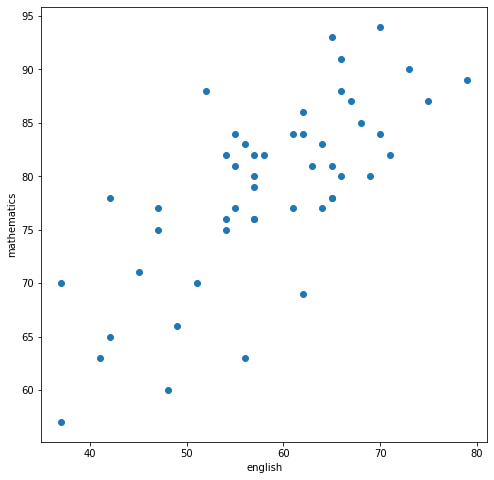

In [24]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)     #1x1 그리드을 만들어, 1번째에 만들겠다.. 라는 의미
# 산점도
ax.scatter(english_scores, math_scores)  # ax.scatter(x축의 데이터, y축의 데이터) => 직전에 만들어 놓은 ax라는 서브플롯에 scatter 메소드를 사용해 산점도를 그린다.
ax.set_xlabel('english') # =>  x축의 라벨명을 넣는것
ax.set_ylabel('mathematics') # y축의 라벨명을 넣는것
plt.show()  # 산점도를 보여줘!! 하는 코드입니다. 이것을 해야지 산점도가 보입니다. plt.show()

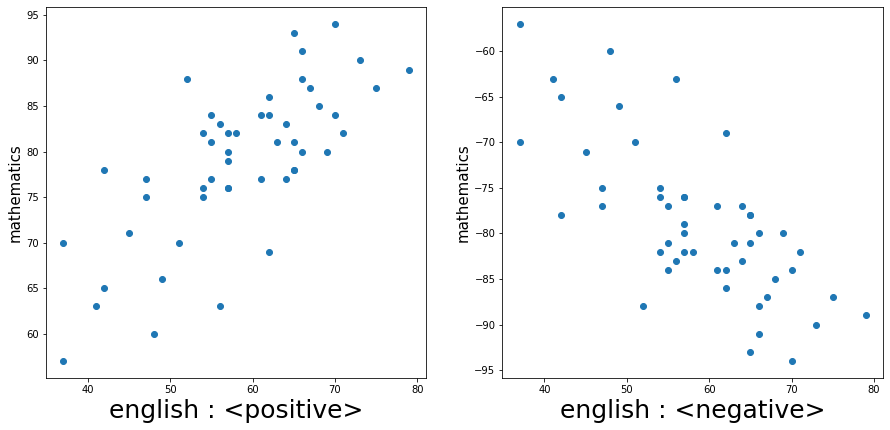

In [25]:

# 이 코드들은 양의 상관관계 산점도와 음의 상관관계 산점도를 비교하기 위해 만들었습니다.!!!(by 화영)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(221)  #1x1 그리드을 만들어, 1번째에 만들겠다.. 라는 의미
bx = fig.add_subplot(222)

# 산점도
ax.scatter(english_scores, math_scores)
bx.scatter(english_scores, -math_scores)
ax.set_xlabel('english : <positive>',fontsize=25)
ax.set_ylabel('mathematics',fontsize=15)
bx.set_xlabel('english : <negative>',fontsize=25)
bx.set_ylabel('mathematics',fontsize=15)
plt.show()

-------------
### <span style="color:red">산점도를 통해 영어 점수가 높은 사람일수록 수학점수도 높은 경향이 있다는 것을 알 수 있다.

>add_subplot()메서드의 첫 번째 인수는 Figure의 서브 플롯 행 수를 나타내고 <br/>
두 번째 인수는 서브 플롯 열 수를 나타내고 세 번째 인수는 그리드에서 서브 플롯의 위치를 나타냅니다.<br/>
여기서fig.add_subplot(1,1,1)은 그림의1 X 1 그리드에 첫 번째 위치에 서브 플롯을 추가합니다. <br/>
또는fig.add_subplot(111)을 사용하여 동일한 결과를 얻을 수도 있습니다. add_subplot()메서드는 <br/>
추가 된 서브 플롯에 세부 정보를 플로팅하고 추가하는 데 사용할 수있는 axes 객체를 반환합니다.<br/>
#### [add_subplot() 메서드에 대한 이해](http://daplus.net/python-matplotlib%EC%97%90%EC%84%9C-%EC%9D%B8%EC%88%98%EA%B0%80-fig-add_subplot-111%EC%9D%98-%EC%9D%98%EB%AF%B8%EB%8A%94-%EB%AC%B4%EC%97%87%EC%9E%85%EB%8B%88%EA%B9%8C/)


<center>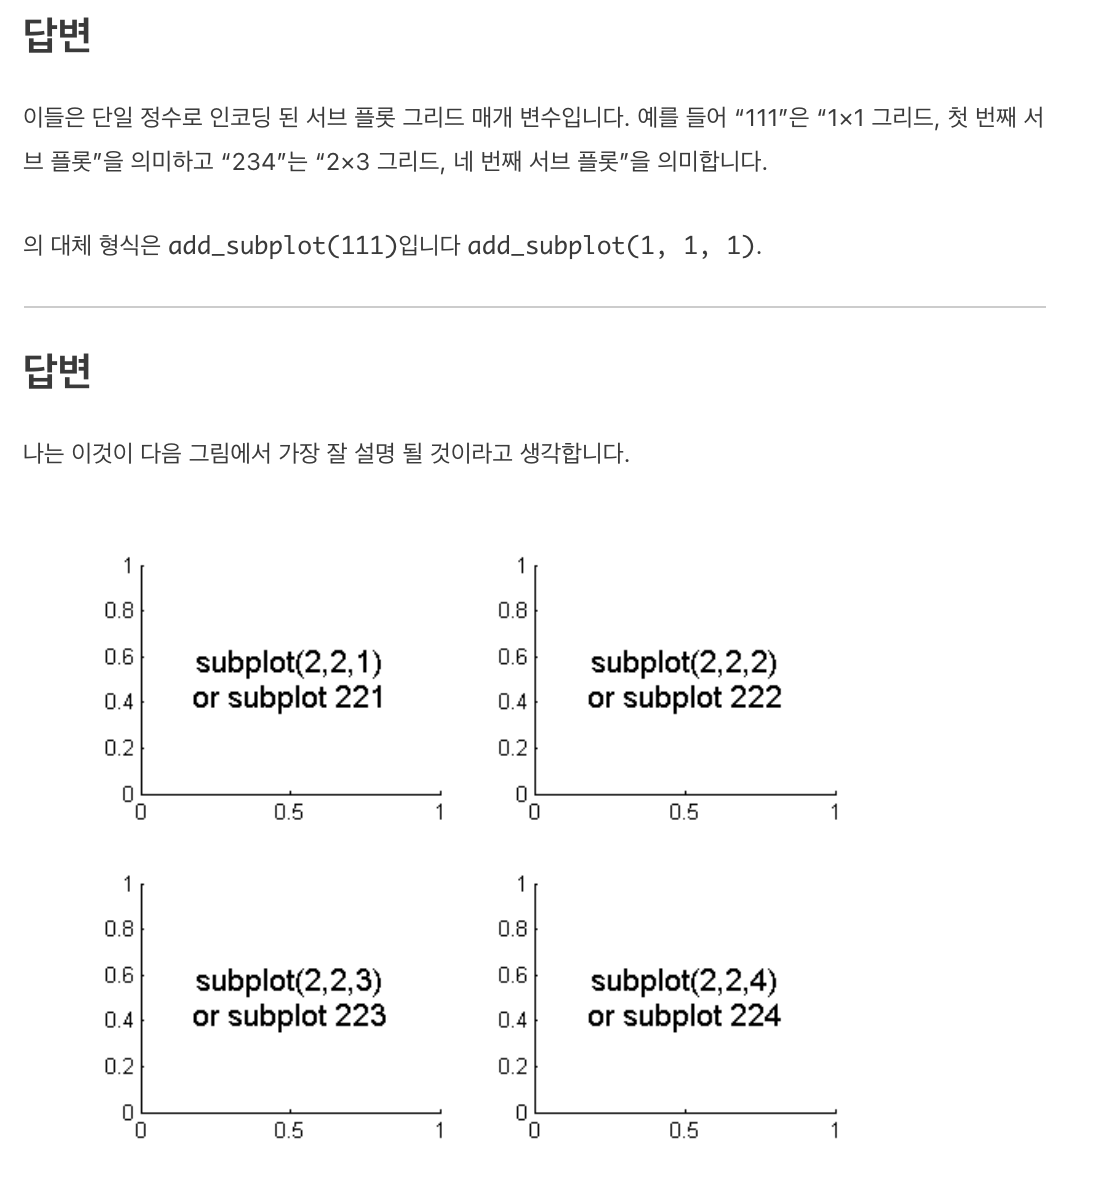</center>

## <span style = "color:magenta">회귀직선
    
>회귀직선(regression line)은 두 데이터 사이의 관계를 더 잘 나타내는 <u>**직선**</u> 이다.<br/>
matplotlib 에는 회귀직선을 직접 그리는 메서드가 없어서 Numpy를 이용해 회귀직선을 구한다.<br/>
<span stlye = "color=red">**`np.polyfit`, `np.poly1d` 함수를 사용한다.**<br/>
영어점수를 $x$, 수학점수를 $y$로 했을 때<br/>
**회귀직선** $y=\beta_{0} + \beta_{1}x$ 를 구할 수 있다.


#### 회귀 직선을 산점도와 함께 그려보는 코드 

### **<span style = "color:orange"> $회귀직선 : y=\beta_{0} + \beta_{1}x$**
    
    

In [26]:
# 계수β_0와β_1를 구한다. (=쉽게말해 회귀직선의 기울기와 y절편 구하기)
poly_fit = np.polyfit(english_scores, math_scores, 1) #세번째 인자는 함수의 차수 : 즉 우리는 직선을 찾고 싶은 거니까 1차식의 계수를 찾고 싶은거니까 1을 넣는다.
poly_fit                                                                    #만약 2차식의 계수를 찾고 싶으면 세번째 인자에 2를 넣어준다.

array([ 0.621, 42.601])

`polyfit` 함수로 구한 계수를 가지고, 예측값을 찾을 수 없다.<br/> 
함수(function)로 만들어 줘서 입력을 주고 결과를 얻을 수 있어야 한다.
그래서 필요한 함수가 `poly1d`함수이다. <br/>

### [polyfit , poly1d 함수에 대한 자료](https://pinkwink.kr/1127)

In [27]:
poly_1d = np.poly1d(poly_fit)
poly_1d

poly1d([ 0.621, 42.601])

In [28]:
# 계수β_0와β_1를 구한다. (=쉽게말해 회귀직선의 기울기와 y절편 구하기)
poly_fit = np.polyfit(english_scores, math_scores, 1)
# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
xs

array([37.   , 37.857, 38.714, 39.571, 40.429, 41.286, 42.143, 43.   ,
       43.857, 44.714, 45.571, 46.429, 47.286, 48.143, 49.   , 49.857,
       50.714, 51.571, 52.429, 53.286, 54.143, 55.   , 55.857, 56.714,
       57.571, 58.429, 59.286, 60.143, 61.   , 61.857, 62.714, 63.571,
       64.429, 65.286, 66.143, 67.   , 67.857, 68.714, 69.571, 70.429,
       71.286, 72.143, 73.   , 73.857, 74.714, 75.571, 76.429, 77.286,
       78.143, 79.   ])

In [29]:
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs) # = 회귀직선식인 0.62x + 42.6에 xs값을 넣어 ys값을 구한다. 예를 들면, (0.621 * 65.594) + 42.601 = 65.594 가 나오고, 이것이 y좌표가 됩니다. 
ys

array([65.594, 66.127, 66.659, 67.192, 67.725, 68.257, 68.79 , 69.323,
       69.855, 70.388, 70.92 , 71.453, 71.986, 72.518, 73.051, 73.584,
       74.116, 74.649, 75.182, 75.714, 76.247, 76.78 , 77.312, 77.845,
       78.378, 78.91 , 79.443, 79.975, 80.508, 81.041, 81.573, 82.106,
       82.639, 83.171, 83.704, 84.237, 84.769, 85.302, 85.835, 86.367,
       86.9  , 87.433, 87.965, 88.498, 89.031, 89.563, 90.096, 90.628,
       91.161, 91.694])

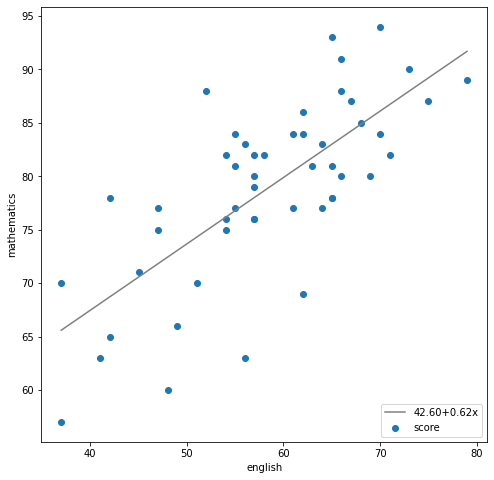

In [30]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',                             #plot함수 메서드는 직선을 만드는 코드 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')     #label = 그래프에 회귀직선 같이 보여주게하려고 만드는 것 
# 범례의 표시
ax.legend(loc='lower right') # 범례 위치 설정 legend(loc='upper/lower right/left')

plt.show() #꼭 plt.show 치기

----
### [plot에 대해 더 자세히 알기](https://kongdols-room.tistory.com/90)

<center>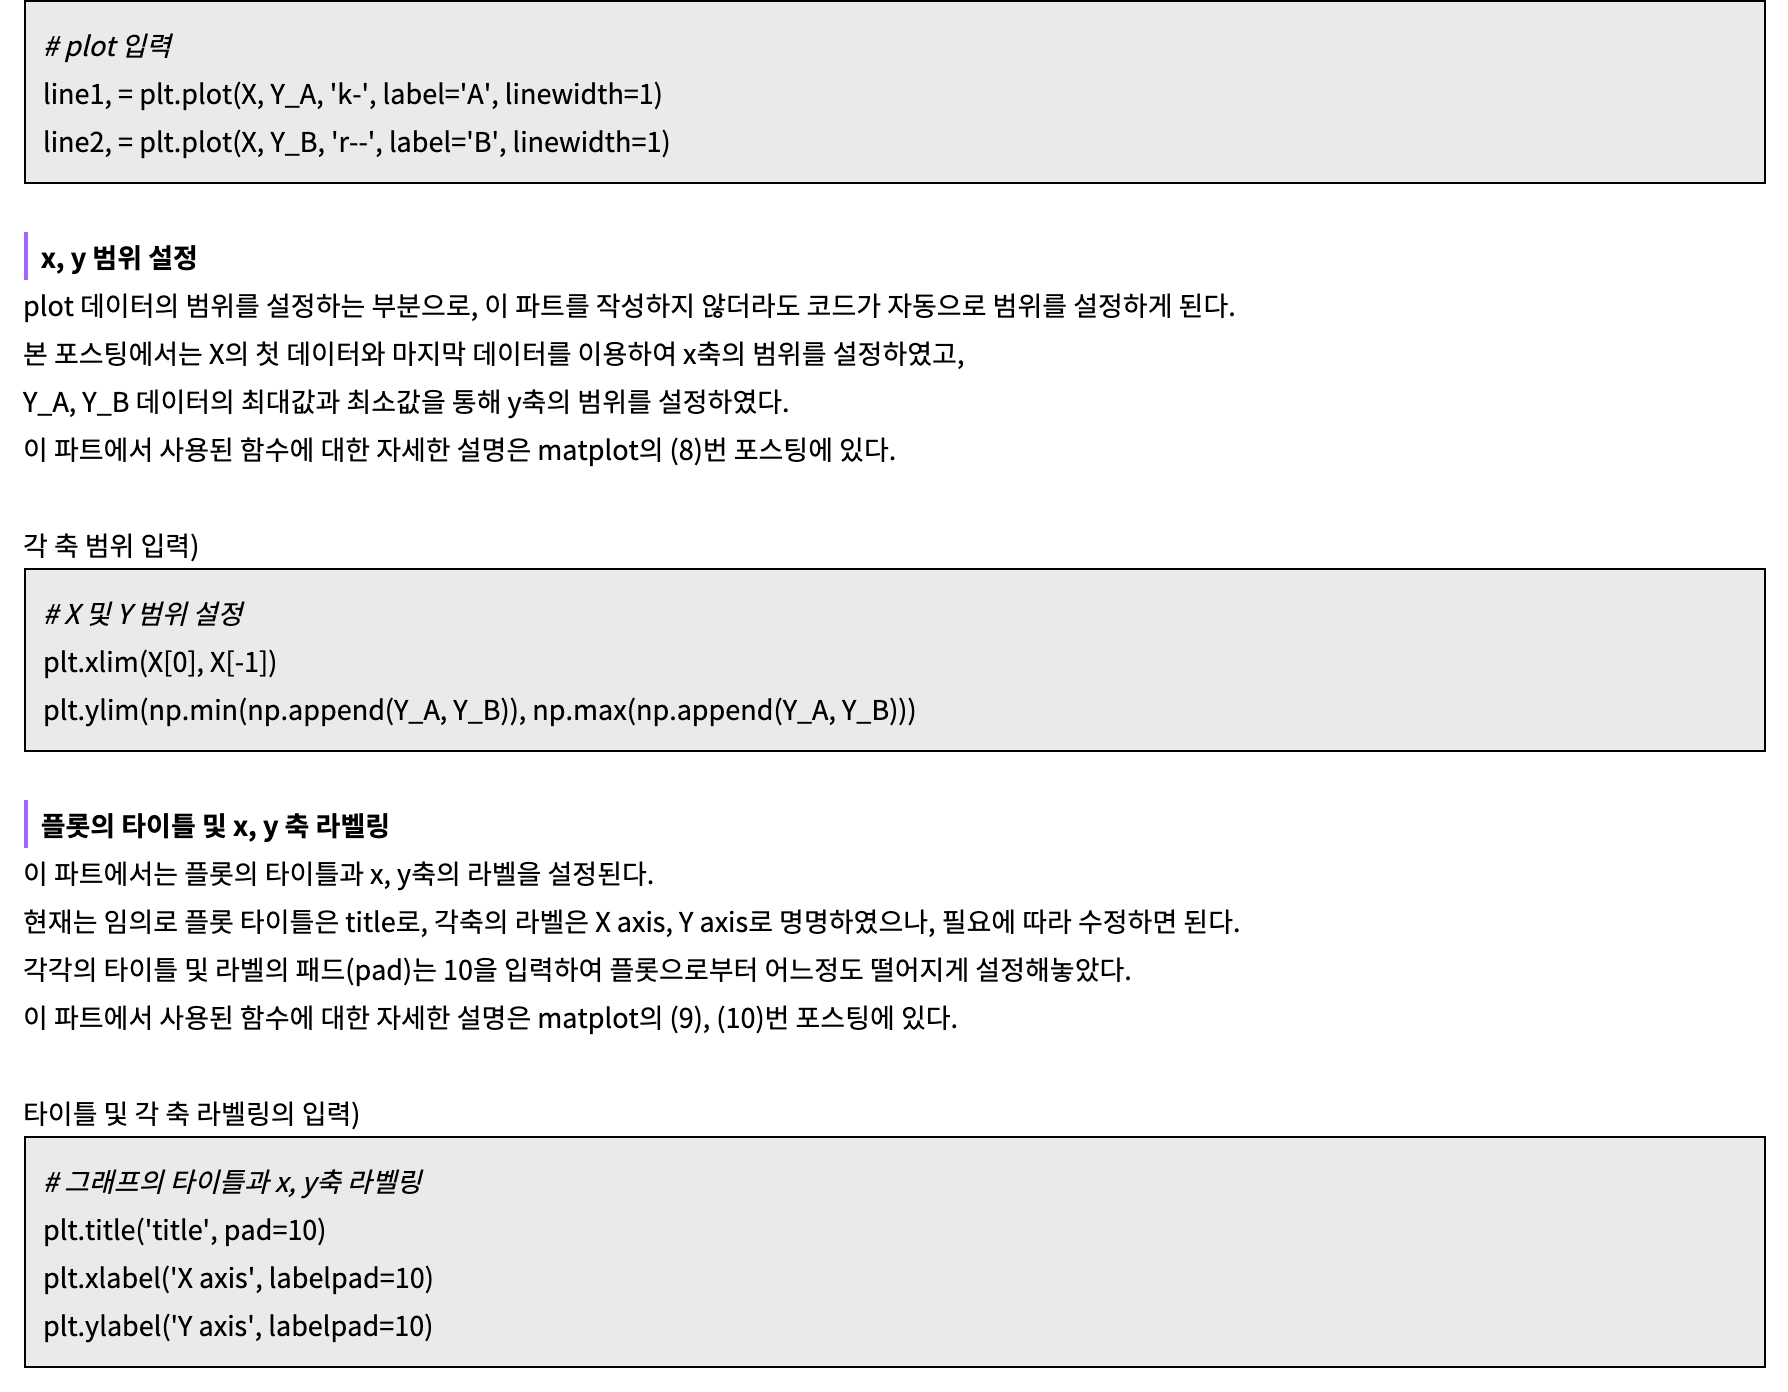</center>

# <span style = "color:magenta">히트맵

>히트맵은 히스토그램의 2차원 버전으로 색을 이용해 표현할 수 있는 그래프이다.
<span style="color:red">`hist2d` 메서드로 작성할 수 있다. <br/>
인수도 `hist`메서드와 거의 동일하다.<br/>
`bins` 와 `range`를 인수로 지정한다. </span><br/>
색이 진한 영역이면 많은 학생들이 분포되어 있다.

## [히트맵, 히스토그램에 대한 자료](https://yganalyst.github.io/etc/visual_1/)

<center>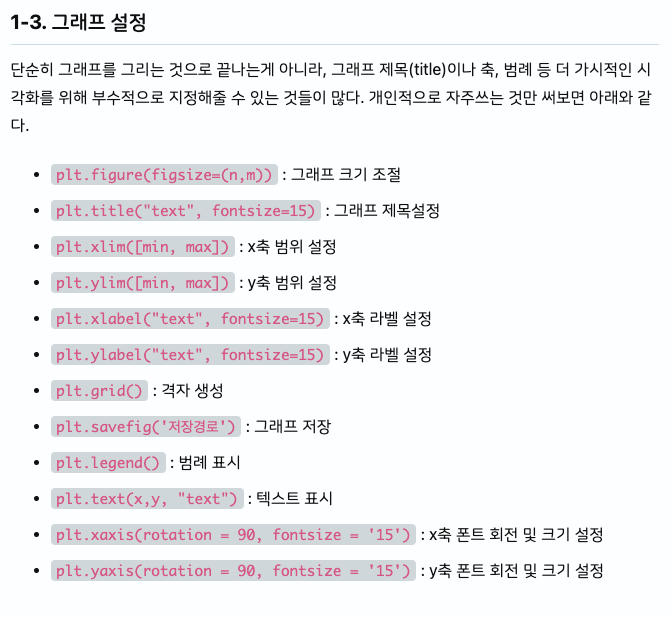</center>


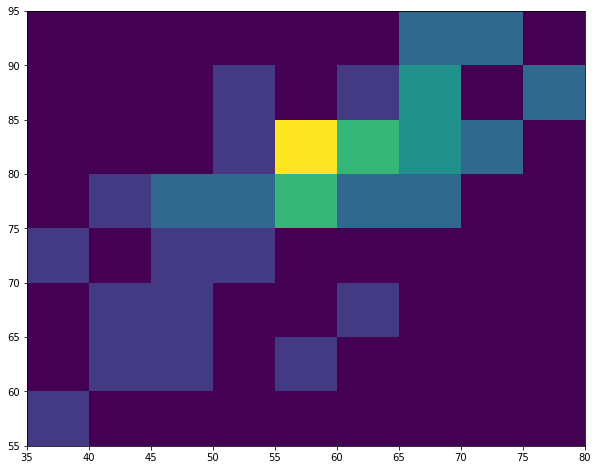

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])


In [32]:
c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])  #35~80 사이를 5간격으로 나누면 9구간이 나오고, 55~95 사이를 5간격으로 나누면 8구간이 나온다.
                                                        #(40,45,50,55,60,65,70,75,80) / (60,65,70,75,80,85,90,95)
c

(array([[1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 1., 0., 0., 0.],
        [0., 1., 1., 1., 2., 0., 0., 0.],
        [0., 0., 0., 1., 2., 1., 1., 0.],
        [0., 1., 0., 0., 4., 6., 0., 0.],
        [0., 0., 1., 0., 2., 4., 1., 0.],
        [0., 0., 0., 0., 2., 3., 3., 2.],
        [0., 0., 0., 0., 0., 2., 0., 2.],
        [0., 0., 0., 0., 0., 0., 2., 0.]]),
 array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 array([55., 60., 65., 70., 75., 80., 85., 90., 95.]),
 <matplotlib.collections.QuadMesh at 0x7ff527b55090>)

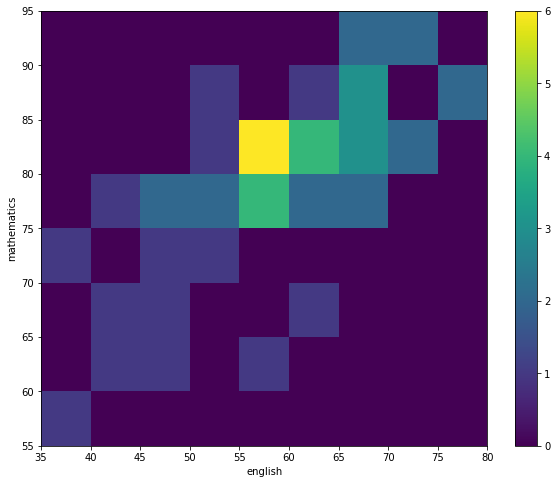

In [33]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])  #35~80 사이를 5간격으로 나누면 9구간이 나오고, 55~95 사이를 5간격으로 나누면 8구간이 나온다.
                                                        #(40,45,50,55,60,65,70,75,80) / (60,65,70,75,80,85,90,95)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1])  # set_xticks는 x축 눈금을 설정해주는 코드입니다. x축에 아까 설정한 35~80 구간이 표시됩니다.
#ax.set_xticks(c[2]) #=> c[1]대신 c[2]를 넣어 실행하면 값이 색칠되는 면적도 바뀌고 x축의 눈금도 바뀝니다. 한번 해보시면 무엇을 설정하는 코드인지 아실 수 있어요! 
                    #=> c[1]은 array([35., 40., 45., 50., 55., 60., 65., 70., 75., 80.])이고
                    #=> c[2]는 array([55., 60., 65., 70., 75., 80., 85., 90., 95.]) 입니다. 우리가 range로 설정한 부분이요.
                    
            
ax.set_yticks(c[2]) # y축 눈금을 설정해주는 코드입니다. 그래서 y축에 아까 설정한 55~95 구간이 표시됩니다.
#ax.set_yticks(c[1]) #=> 이것도 마찬가지로 위에 것 대신 실행해보세요! 


# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
#fig.colorbar() =>오류남
plt.show()

>**<span style = "color:red">x-label을 설정하기 전에 먼저 x-ticks을 설정해야 한다.</span><br/>**
왜냐하면 막대 당 하나의 눈금이 붙는 게 기본 값이 아니기 때문이다.<br/>
특히 많은 막대를 그리는 경우에는 자연스럽게 눈금이 생략될 수 있다. <br/> 
x-label 앞에 x-ticks을 설정하는 것을 건너 뛰면 잘못된 위치에 눈금이 생길 수도 있다.

## <span style = "color:magenta">앤스컴의 예

동일해 보이는 지표를 가진 데이터라도 그림으로 나타내면 종종 전혀 다른 데이터가 되곤 한다.
동일한 지표를 가지고 있지만 전혀 다른 데이터가 되는 예로 `앤스컴의 예` 라고 불리는 데이터를 사용해서 살펴보겠다.

In [34]:
# npy 형식으로 저장된 NumPy array를 읽어들인다
anscombe_data = np.load('../data/ch3_anscombe.npy') #load 는 .npy나 .npz 형식의 파일을 읽는 코드이다.
print(anscombe_data.shape) #데이터가 네가지 들어있고, 각각11개의 2차원 데이터다.

(4, 11, 2)


In [35]:
anscombe_data 

array([[[10.  ,  8.04],
        [ 8.  ,  6.95],
        [13.  ,  7.58],
        [ 9.  ,  8.81],
        [11.  ,  8.33],
        [14.  ,  9.96],
        [ 6.  ,  7.24],
        [ 4.  ,  4.26],
        [12.  , 10.84],
        [ 7.  ,  4.82],
        [ 5.  ,  5.68]],

       [[10.  ,  9.14],
        [ 8.  ,  8.14],
        [13.  ,  8.74],
        [ 9.  ,  8.77],
        [11.  ,  9.26],
        [14.  ,  8.1 ],
        [ 6.  ,  6.13],
        [ 4.  ,  3.1 ],
        [12.  ,  9.13],
        [ 7.  ,  7.26],
        [ 5.  ,  4.74]],

       [[10.  ,  7.46],
        [ 8.  ,  6.77],
        [13.  , 12.74],
        [ 9.  ,  7.11],
        [11.  ,  7.81],
        [14.  ,  8.84],
        [ 6.  ,  6.08],
        [ 4.  ,  5.39],
        [12.  ,  8.15],
        [ 7.  ,  6.42],
        [ 5.  ,  5.73]],

       [[ 8.  ,  6.58],
        [ 8.  ,  5.76],
        [ 8.  ,  7.71],
        [ 8.  ,  8.84],
        [ 8.  ,  8.47],
        [ 8.  ,  7.04],
        [ 8.  ,  5.25],
        [19.  , 12.5 ],
        [ 

In [36]:
anscombe_data[0]

array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [37]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):  #enumerate는 무엇일까요?? enumerate() 함수는 기본적으로 인덱스와 원소로 이루어진 터플(tuple)을 만들어준다. 
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1) 
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

data1       data2       data3       data4
X_mean                     9.00        9.00        9.00        9.00
X_variance                10.00       10.00       10.00       10.00
Y_mean                     7.50        7.50        7.50        7.50
Y_variance                 3.75        3.75        3.75        3.75
X&Y_correlation            0.82        0.82        0.82        0.82
X&Y_regression line  3.00+0.50x  3.00+0.50x  3.00+0.50x  3.00+0.50x

**모든 데이터가 평균부터 회귀직선 식까지 전부 일치한다. 지표상으로 보면 이 네가지 데이터는 모두 동일하다고 할 수 있다.<br/> 
정말 이 네가지 데이터가 완전히 동일한지 확인하기 위해 산점도를 그려보자.**

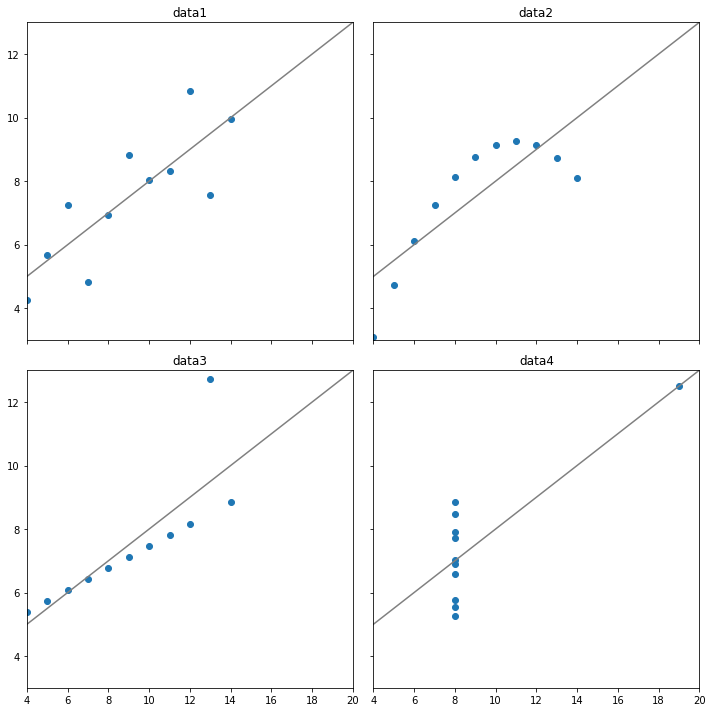

In [38]:
# 그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10),
                         sharex=True, sharey=True)

xs = np.linspace(0, 30, 100) 
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1) 
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    # 그리는 영역을 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    # 타이틀을 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()